## Capstone Project - The Battle of Neighborhoods (Week 2)

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item1"> Introduction / Business  Problem </a>   
    
    
    
2. <a href="#item2">Data </a> 
    
    
    
    
3. <a href="#item3">Methodology </a>
    
    
    
    
4. <a href="#item1">Analyzing the data</a> 
    
    
    
    
5. <a href="#item2">Results and Observations </a> 
    
    
    
6. <a href="#item3">Conclusions </a>
   
</font>
</div>

# Introduction / Business  Problem

## Background on financial centres 

Financial centres are locations with large concentration of banking institutions, asset management companies , insurance companies and other financial market players. They are catalyst for global growth with economic influence. 

Chicago is leading financial hub in derivatives market. The Chicago Mercantile Exchange is the oldest futures trading exchange in the world and is known for global derivative trading. The city is home to the Chicago Stock Exchange, the Federal Reserve Bank of Chicago, The Chicago Mercantile Exchange and the Chicago Board of Trade. With dozens of major banks, it remains seconds national financial hub after New York City.



## Business Problem

Chicago is prominent financial centres, providing wide range of financial services. They have numerous leading banks and financial intuitions which are headquartered in  Chicago. Hence  the question is - Which financial services is highly concentrated in Chicago ?


## Interest 

Prospective job seekers looking for roles in finance would be interested in knowing which financial services is highly demanded. Financial consultant firms who are keen in expanding their services in Chicago would be interested.




# Data 

## Section 1 - Sources of data 

The following is list of data which I have used to solve the problem - - Which financial services is highly concentrated in Chicago ?

1) List of  Chicago  neighborhoods had been sourced from Wikipedia site. The website contained a table of different neighborhoods along with community areas . There are 246 Chicago neighborhoods.

2)  I have used the Geopy package to generate latitude and longitude values for Chicago neighborhoods.


3)  I have used Foursquare API  to find the financial institutions/banks around the neighborhoods of  Chicago within 800 meter radius. 


Section 2 - Data Cleaning  and Analysis

There was one neighborhoods which had missing values. Hence the row was dropped, making number of neighborhoods total as 245. From Geopy package, latitude,  longitude, altitude, point and location were generated. Columns such as point,  altitude and location had been dropped. Latitude and longitude columns were renamed by making their first letter uppercase. 

With help of Foursquare API, I used search query to generate JSON file containing raw list of financial institutions and other institutions within radius of 500 meter.  I assigned relevant part of JSON file to obtain results containing details of financial institutions like location address, latitude, longitude , category and etc.  After normalizing JSON file, I obtained unfiltered data frame of financial institution. I only took necessary columns like name of the institution, latitude , longitude and category which institution belongs to and stored in different data frame.


This data frame contained 30 venues  located in Chicago within radius of 800 meters.  


## Section 3- Analysis of Data

With help of this data, I was able to generate a map showing the location of thirty financial institutions located in Chicago. 

Based on the data frame containing 30 financial institutions, I got the  distinct count of  categories.  There were  14 distinct categories in which I removed the categories that didn't belong to financial services criteria. Finally I had 8 distinct categories.



In [1]:
#importing necessary libraries for data analysis purposes

import pandas as pd
import numpy as np


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-


# Downloading and exploring  the dataset :



In [2]:
#reading the data


data = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago', header = 0 )
col = ['Neighborhood', 'Community area']
for data in data:
    current_col = data.columns.values[:2]
    if len(current_col) != len(col):
        continue
    if all(current_col == col):
        break

data.head()

,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [3]:
#replacing Neighborhood value from Legends South (Robert Taylor Homes) as Legend South as geopy doesn't recognise it.
data.Neighborhood = data.Neighborhood.replace({"Legends South (Robert Taylor Homes)" : "Legends South"})


# Generating the latitudes and longitudes for each Neighborhood

In [4]:
# installing geopandas and geopy

!pip install geopandas
!pip install geopy



     |████████████████████████████████| 921kB 14.3MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 20.7MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 59.1MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 16.4MB/s eta 0:00:01


In [5]:
address = 'Chicago, Illinois'

geolocator = Nominatim(user_agent="il_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [6]:
#generating latitude and longitude for each Neighborhood.
from geopy.extra.rate_limiter import RateLimiter
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
data['location'] = data['Neighborhood'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
data['point'] = data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
data[['latitude', 'longitude','altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Edgewater Glen',), **{}).
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1254, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1300, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1249, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 974, in send
    self.connect()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Sheffield Neighbors',), **{}).
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1254, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1300, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1249, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 974, in send
    self.connect()
  File "/opt/conda/envs/Python36/lib/python3.6/http/c

RateLimiter caught an error, retrying (0/2 tries). Called with (*('South Lawndale',), **{}).
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1254, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1300, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1249, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 974, in send
    self.connect()
  File "/opt/conda/envs/Python36/lib/python3.6/http/client

In [7]:
data.head()

,Neighborhood,Community area,location,point,latitude,longitude,altitude
0,Albany Park,Albany Park,"(Albany Park, Chicago, Cook County, Illinois, ...","(41.9719367, -87.7161739, 0.0)",41.971937,-87.716174,0.0
1,Altgeld Gardens,Riverdale,"(Altgeld Gardens, Riverdale, Chicago, Cook Cou...","(41.654863750000004, -87.60044615358365, 0.0)",41.654864,-87.600446,0.0
2,Andersonville,Edgewater,"(Andersonville, Sumter County, Georgia, 31711,...","(32.1959947, -84.1399085, 0.0)",32.195995,-84.139909,0.0
3,Archer Heights,Archer Heights,"(Archer Heights, Chicago, Cook County, Illinoi...","(41.8114215, -87.7261651, 0.0)",41.811422,-87.726165,0.0
4,Armour Square,Armour Square,"(Armour Square, Chicago, Cook County, Illinois...","(41.8400333, -87.633107, 0.0)",41.840033,-87.633107,0.0


In [8]:
#dropping unnecessary columns
data = data.drop(['location','point','altitude'],axis = 1)


In [18]:
#renaming the columns
data = data.rename(columns = {'latitude' : 'Latitude', 'longitude' : 'Longitude'})

In [11]:
#deleting missing values
data = data.dropna()

In [12]:
#no of neighborhood
data.head()
data.shape

(245, 4)

In [81]:
data.head()

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park,Albany Park,41.971937,-87.716174
1,Altgeld Gardens,Riverdale,41.654864,-87.600446
2,Andersonville,Edgewater,32.195995,-84.139909
3,Archer Heights,Archer Heights,41.811422,-87.726165
4,Armour Square,Armour Square,41.840033,-87.633107


#  Analysing the data

In [13]:
# Generating the map of Chicago using latitude and longitude values
map_ch = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, community, neighborhood in zip(data['Latitude'], data['Longitude'], data['Community area'], data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ch)  
    
map_ch
    


In [14]:
#creating credentials for foursquare
CLIENT_ID = 'RXQMOAB1ZL3GKWN4LKOFIEVOPBS5GIISYJMUNTSPPRJ1D32X' 
CLIENT_SECRET = 'DLN0KYP0AMGB5PLPF3INC4SKKJGWCNLOKKM3TFTG1C2QHF22' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RXQMOAB1ZL3GKWN4LKOFIEVOPBS5GIISYJMUNTSPPRJ1D32X
CLIENT_SECRET:DLN0KYP0AMGB5PLPF3INC4SKKJGWCNLOKKM3TFTG1C2QHF22


In [15]:
#generating the latitudes and longitudes of Chicago
address = 'Chicago, Illinois'

geolocator = Nominatim(user_agent="il_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


## Searching Foursquare API for financial institution which are within radius of 800

In [16]:
#generating search query and radius
search = 'financial'
radius = 800



In [17]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}'.format(CLIENT_ID,
                                                                                                                          CLIENT_SECRET, 
                                                                                                                          latitude,
                                                                                                                          longitude,
                                                                                                                          VERSION, 
                                                                                                                          search,
                                                                                                                          radius)
url

'https://api.foursquare.com/v2/venues/search?client_id=RXQMOAB1ZL3GKWN4LKOFIEVOPBS5GIISYJMUNTSPPRJ1D32X&client_secret=DLN0KYP0AMGB5PLPF3INC4SKKJGWCNLOKKM3TFTG1C2QHF22&ll=41.8755616,-87.6244212&v=20180605&query=financial&radius=800'

In [23]:
#generating json file from Foursquare search query
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3d7564216785001be1d058'},
 'response': {'venues': [{'id': '4ded40b0814d56e3082fe12a',
    'name': 'LaSalle Street Financial District',
    'location': {'address': 'Lasalle St',
     'crossStreet': 'Jackson Blvd',
     'lat': 41.88000523104413,
     'lng': -87.63228603139655,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.88000523104413,
       'lng': -87.63228603139655}],
     'distance': 818,
     'postalCode': '60604',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['Lasalle St (Jackson Blvd)',
      'Chicago, IL 60604',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f6931735',
      'name': 'General Travel',
      'pluralName': 'General Travel',
      'shortName': 'Travel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1581086064',

In [24]:
from pandas.io.json import json_normalize
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f6931735', 'name': 'G...",False,4ded40b0814d56e3082fe12a,Lasalle St,US,Chicago,United States,Jackson Blvd,818,"[Lasalle St (Jackson Blvd), Chicago, IL 60604,...","[{'label': 'display', 'lat': 41.88000523104413...",41.880005,-87.632286,60604,IL,LaSalle Street Financial District,v-1581086064
1,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",False,4cfea2d9fabc2d43d748dfd2,47 W Polk St Ste 325,US,Chicago,United States,"Dearborn Station, Suite M-1",553,"[47 W Polk St Ste 325 (Dearborn Station, Suite...","[{'label': 'display', 'lat': 41.87206142676932...",41.872061,-87.629158,60605,IL,Coleman Conley - Ameriprise Financial Services...,v-1581086064
2,"[{'id': '58daa1558bbb0b01f18ec1f1', 'name': 'I...",False,5b45c655286fda002cb91e40,"175 W Jackson Blvd, Suite 940",US,Chicago,United States,NaN,772,"[175 W Jackson Blvd, Suite 940, Chicago, IL 60...","[{'label': 'display', 'lat': 41.87768410456065...",41.877684,-87.633300,60604,IL,"The Pietsch Financial Group, Inc.",v-1581086064
3,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",False,554acaff498eae744658eb90,190 S La Salle St Ste 440,US,Chicago,United States,NaN,829,"[190 S La Salle St Ste 440, Chicago, IL 60603,...","[{'label': 'display', 'lat': 41.8796011, 'lng'...",41.879601,-87.632830,60603,IL,William J Harris - Ameriprise Financial Servic...,v-1581086064
4,"[{'id': '5453de49498eade8af355881', 'name': 'B...",False,555a2c25498ec84f76c20420,33 N Dearborn St Ste 1400,US,Chicago,United States,NaN,900,"[33 N Dearborn St Ste 1400, Chicago, IL 60602,...","[{'label': 'display', 'lat': 41.88282698957324...",41.882827,-87.629202,60602,IL,Daniel Schreiner - Ameriprise Financial Servic...,v-1581086064


In [25]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filtering the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# cleaning column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,LaSalle Street Financial District,General Travel,Lasalle St,US,Chicago,United States,Jackson Blvd,818,"[Lasalle St (Jackson Blvd), Chicago, IL 60604,...","[{'label': 'display', 'lat': 41.88000523104413...",41.880005,-87.632286,60604,IL,4ded40b0814d56e3082fe12a
1,Coleman Conley - Ameriprise Financial Services...,Financial or Legal Service,47 W Polk St Ste 325,US,Chicago,United States,"Dearborn Station, Suite M-1",553,"[47 W Polk St Ste 325 (Dearborn Station, Suite...","[{'label': 'display', 'lat': 41.87206142676932...",41.872061,-87.629158,60605,IL,4cfea2d9fabc2d43d748dfd2
2,"The Pietsch Financial Group, Inc.",Insurance Office,"175 W Jackson Blvd, Suite 940",US,Chicago,United States,NaN,772,"[175 W Jackson Blvd, Suite 940, Chicago, IL 60...","[{'label': 'display', 'lat': 41.87768410456065...",41.877684,-87.633300,60604,IL,5b45c655286fda002cb91e40
3,William J Harris - Ameriprise Financial Servic...,Financial or Legal Service,190 S La Salle St Ste 440,US,Chicago,United States,NaN,829,"[190 S La Salle St Ste 440, Chicago, IL 60603,...","[{'label': 'display', 'lat': 41.8796011, 'lng'...",41.879601,-87.632830,60603,IL,554acaff498eae744658eb90
4,Daniel Schreiner - Ameriprise Financial Servic...,Business Service,33 N Dearborn St Ste 1400,US,Chicago,United States,NaN,900,"[33 N Dearborn St Ste 1400, Chicago, IL 60602,...","[{'label': 'display', 'lat': 41.88282698957324...",41.882827,-87.629202,60602,IL,555a2c25498ec84f76c20420
5,MB Financial Bank ATM Center,Bank,2460 N Clark St,US,Chicago,United States,NaN,858,"[2460 N Clark St, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.88197584608591...",41.881976,-87.630165,60614,IL,4ba1072df964a520809037e3
6,One Financial Place,Office,440 S La Salle St,US,Chicago,United States,NaN,623,"[440 S La Salle St, Chicago, IL 60605, United ...","[{'label': 'display', 'lat': 41.8759225564996,...",41.875923,-87.631931,60605,IL,4beacbc662c0c9289b40e1d4
7,columbia college financial services,College Administrative Building,600 S Michigan Ave,US,Chicago,United States,NaN,120,"[600 S Michigan Ave, Chicago, IL 60605, United...","[{'label': 'display', 'lat': 41.87451, 'lng': ...",41.874510,-87.624789,60605,IL,5342b66b498e42e21dc7101b
8,Financial Inbound Marketing,Building,141 W Jackson Blvd,US,Chicago,United States,NaN,657,"[141 W Jackson Blvd, Chicago, IL 60604, United...","[{'label': 'display', 'lat': 41.87759766010446...",41.877598,-87.631867,60604,IL,562682c3498e01e52c2b8bb0
9,Roosevelt University- Financial Aid Office,Student Center,NaN,US,NaN,United States,NaN,230,"[Illinois, United States]","[{'label': 'display', 'lat': 41.87747484903967...",41.877475,-87.625471,NaN,Illinois,4d8a501e6daeb60c710762e0


In [26]:
#generating a copy of filtered dataframe with only required columns
venues_df = dataframe_filtered[['name','categories','lat','lng']].copy()
venues_df

,name,categories,lat,lng
0,LaSalle Street Financial District,General Travel,41.880005,-87.632286
1,Coleman Conley - Ameriprise Financial Services...,Financial or Legal Service,41.872061,-87.629158
2,"The Pietsch Financial Group, Inc.",Insurance Office,41.877684,-87.633300
3,William J Harris - Ameriprise Financial Servic...,Financial or Legal Service,41.879601,-87.632830
4,Daniel Schreiner - Ameriprise Financial Servic...,Business Service,41.882827,-87.629202
5,MB Financial Bank ATM Center,Bank,41.881976,-87.630165
6,One Financial Place,Office,41.875923,-87.631931
7,columbia college financial services,College Administrative Building,41.874510,-87.624789
8,Financial Inbound Marketing,Building,41.877598,-87.631867
9,Roosevelt University- Financial Aid Office,Student Center,41.877475,-87.625471


In [27]:
#generating maps which shows the financials centers located in the neighborhood
map_venues_fin = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, neighborhood in zip(venues_df['lat'], venues_df['lng'], venues_df['name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_fin) 
    
map_venues_fin

#  Representation of number of financial services based on categories

In [28]:
#creating series object which represents the number of financial services based on categories
venues_df_fin = venues_df['categories'].value_counts()
venues_df_fin

Financial or Legal Service         8
Office                             6
Building                           3
Business Service                   2
Bank                               2
Government Building                1
Check Cashing Service              1
General Travel                     1
Outdoor Sculpture                  1
Student Center                     1
Bike Rental / Bike Share           1
College Administrative Building    1
Parking                            1
Insurance Office                   1
Name: categories, dtype: int64

In [29]:
#keeping only the financial services categories
venues_fin = venues_df_fin.drop(labels = ['General Travel', 'College Administrative Building','Parking','Outdoor Sculpture','Bike Rental / Bike Share','Student Center'])

In [83]:
#converting the series object into dataframe
venues_fin = pd.DataFrame(venues_fin)
venues_fin.rename(columns = {'categories' : 'counts','index' : 'categories'})


,categories,counts
0,Financial or Legal Service,8
1,Office,6
2,Building,3
3,Business Service,2
4,Bank,2
5,Government Building,1
6,Check Cashing Service,1
7,Insurance Office,1


The above mentioned categories include different financial services as well as general business. The business services, Buildings, offices and Government Buildings  are either asset management offices or financial regulatory bodies.

## Bar chart representing the number of financial services.

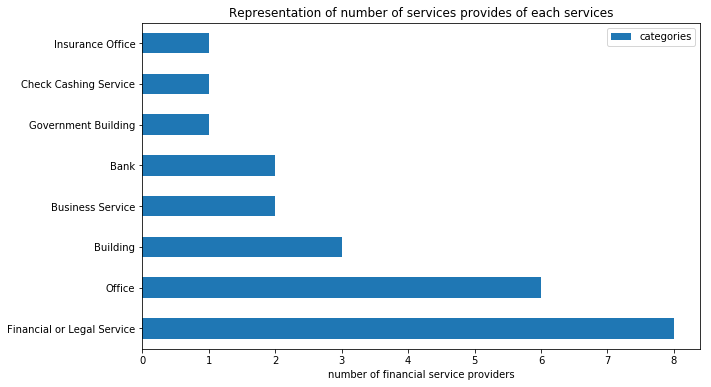

In [32]:
#generating bar chart
venues_fin.plot(kind='barh', figsize=(10, 6))

plt.xlabel('number of financial service providers')

plt.title('Representation of number of services provides of each services')


plt.show()



#  Results and Observation

As per the above bar graph, we can note that the financial or legal services are most highly concentrated financial service sector. These financial or legal service firms are regulatory firms that provide services related to anti money laundering and compliance. They checks suspicious transactions as well monitor any money laundering activities. They also make sure their regulatory measures are compiled. The second highly concentrated financial service sector are asset management offices which comprises the building ,business services and office. The least concentrated is the insurance companies. 

#  Conclusion

Hence the question - Which financial services is highly concentrated in Chicago ? has been solved. With the help of Foursquare API, I was able to generate financial institution with 500 meters. A bar graph was plotted based on number of financial services providers within each category. The highly concentrated financial service sector is financial or legal firms which are regulatory firms that provide services related to anti money laundering and compliance. 

These findings may help prospective job seekers looking out for roles in finance sector. The financial consultancy firms can also make decisions regarding whether to expand their services in Chicago.